In [1]:
import baostock as bs
import numpy as np
import pandas as pd

import datetime
# import tensorflow as tf
# from tensorflow import keras
import matplotlib. pyplot as plt 
from tqdm import tqdm

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# @Date: 2021/05/27 Thu
# @Author: ShayXU
# @Filename: 60日均线策略.py


"""
    运行时间: ~01:20, min
"""

import baostock as bs
import pandas as pd

import datetime
from tqdm import tqdm

# 参数
history_days = 120    # 历史股票天数
mean_days = 60        # x日均线
set_date = "2021-04-30"         # 设置日期

# 计算日期
if not set_date:
    now = datetime.datetime.now()
    if now.hour <= 15:
        now -= datetime.timedelta(days=1)
else:
    now = datetime.datetime.strptime(set_date, '%Y-%m-%d')


end_date = now.strftime('%Y-%m-%d')
start_date = (now - datetime.timedelta(days=history_days)).strftime('%Y-%m-%d')
print(start_date, end_date)

# 登陆系统
lg = bs.login()
if lg.error_code != '0':
    print("错误信息:", lg.error_code, lg.error_msg)

# 查询
data_list = []
stock_rs = bs.query_all_stock(end_date)     # 查询全量股票，含指数
stock_df  = stock_rs.get_data()
stock_df  =  stock_df [stock_df ['tradeStatus'] == '1'].reset_index(drop =  True)

data_df = pd.DataFrame()
variance = []       # 计算方差。
for row in tqdm(stock_df.itertuples()):
    code = row[1]
    code_name = row[3]

    # 检测是否收盘超过3个点
    k_rs = bs.query_history_k_data_plus(code, "close,pctChg", end_date, end_date)
    
    pct_chg = float(k_rs.get_row_data()[1])    # percentage change
    if  pct_chg >= 3:
        # print(code, pct_chg)
        k_rs = bs.query_history_k_data_plus(code, "close", start_date, end_date)
        data_df = k_rs.get_data()
        var_tmp = data_df['close'].rolling(mean_days).mean().dropna().var()
        close = float(data_df['close'].iloc[-1])
        variance.append([code, code_name, end_date, pct_chg, var_tmp, close])
        
bs.logout()
result = pd.DataFrame(variance, columns=['code', 'code_name', 'date', 'pct_chg', 'var', 'close'])
result = result.dropna().sort_values(by=['var']).reset_index(drop=True)
result.to_csv(str(mean_days) + "日均线策略.csv", index=False)

2020-12-31 2021-04-30
login success!
4749it [01:37, 48.82it/s]
logout success!


In [85]:
# 计算日期

now = datetime.datetime.now()
if now.hour <= 15:
    now -= datetime.timedelta(days=1)
end_date = now.strftime('%Y-%m-%d')
start_date = (now - datetime.timedelta(days=120)).strftime('%Y-%m-%d')
print(start_date, end_date)

2021-01-26 2021-05-26


In [125]:
"""运行时间: ~4 min"""

# 登陆系统
lg = bs.login()
if lg.error_code != '0':
    print("错误信息:", lg.error_code, lg.error_msg)

# 查询
data_list = []
stock_rs = bs.query_all_stock(end_date)     # 查询全量股票，含指数
stock_df  = stock_rs.get_data()
stock_df  =  stock_df [stock_df ['tradeStatus'] == '1'].reset_index(drop =  True)

data_df = pd.DataFrame()
variance = []       # 计算方差。
for row in tqdm(stock_df.itertuples()):
    # code, tradeStatus, code_name
    code = row[1]
    code_name = row[3]

    # 检测是否收盘超过3个点
    k_rs = bs.query_history_k_data_plus(code, "close,pctChg", end_date, end_date)
    
    pct_chg = float(k_rs.get_row_data()[1])    # percentage change
    if  pct_chg >= 3:
        # print(code, pct_chg)
        k_rs = bs.query_history_k_data_plus(code, "close", start_date, end_date)
        data_df = k_rs.get_data()
        var_tmp = data_df['close'].rolling(60).mean().dropna().var()
        variance.append([code, code_name, pct_chg, var_tmp])
        
bs.logout()
result = pd.DataFrame(variance, columns=['code', 'code_name', 'pct_chg', 'var'])
result = result.dropna().sort_values(by=['var']).reset_index(drop=True)
result.to_csv("60日均线策略.csv", index=False)

login success!
错误信息: 0 success
255it [00:10, 23.60it/s]logout success!



In [176]:
import timeit
def s1():
    for item in stock_df.itertuples():
        a = item[0]

def s2():
    for item in stock_df[['code', 'code_name']].iterrows():
        a = item[0]

t1 = timeit.timeit(s1, number=10)
t2 = timeit.timeit(s2, number=10)
t1, t2, t2 - t1

(0.030880299999807903, 2.279095700000653, 2.248215400000845)

In [188]:
stock_df = pd.read_csv("60日均线策略.csv")
start_date = "2021-05-01"
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

mean_close = []
for row in tqdm(stock_df.itertuples()):
    code = row[1]
    k_rs = bs.query_history_k_data_plus(code, "close", start_date, end_date)
    data_df = k_rs.get_data()
    mean_tmp = data_df['close'].rolling(5).mean().dropna()
    tmp = row[1:]
    tmp.extend(list(mean_tmp))
    mean_close.append(tmp)

e_name='马钢股份', pct_chg=7.3604, var=0.01147358492063495)
Pandas(Index=122, code='sz.002566', code_name='益盛药业', pct_chg=3.9189, var=0.012189444179894295)
Pandas(Index=123, code='sz.002169', code_name='智光电气', pct_chg=6.4858, var=0.012770750925925941)
Pandas(Index=124, code='sz.300938', code_name='信测标准', pct_chg=4.0578, var=0.013089194444444377)
Pandas(Index=125, code='sh.688379', code_name='华光新材', pct_chg=3.0572, var=0.013217821957672193)
Pandas(Index=126, code='sh.600789', code_name='鲁抗医药', pct_chg=3.9216, var=0.013662095767195792)
Pandas(Index=127, code='sz.000155', code_name='川能动力', pct_chg=6.0016, var=0.013716937698412713)
Pandas(Index=128, code='sz.002390', code_name='信邦制药', pct_chg=10.0, var=0.013944880291005202)
Pandas(Index=129, code='sz.000796', code_name='凯撒旅业', pct_chg=3.272, var=0.014446513624338422)
Pandas(Index=130, code='sz.002174', code_name='游族网络', pct_chg=4.6102, var=0.014493961904761809)
Pandas(Index=131, code='sz.000762', code_name='西藏矿业', pct_chg=4.0721, var=0.0149245

In [197]:
var_tmp = data_df['close'].rolling(30).mean().dropna()

In [9]:
a = [[1, 2], [2, 3]]
b = pd.DataFrame(a)
b

,0,1
0,1,2
1,2,3


,a
0,1
1,2


In [187]:
data

,code,code_name,pct_chg,var
0,sh.600778,友好集团,10.1156,0.000029
1,sh.600321,正源股份,7.7670,0.000030
2,sh.600898,ST美讯,5.0360,0.000037
3,sh.600865,百大集团,3.2765,0.000047
4,sz.000677,恒天海龙,5.2239,0.000058
...,...,...,...,...
328,sh.688390,固德威,3.7046,80.055544
329,sh.688200,华峰测控,10.0685,98.651836
330,sh.688111,金山办公,9.7536,124.294258
331,sh.688063,派能科技,3.2838,186.776024


In [133]:
bs.login()
code = 'sz.002069'
k_rs = bs.query_history_k_data_plus(code, "date, close", start_date, end_date)
data_df = k_rs.get_data()
var_tmp = data_df['close'].rolling(60).mean().dropna().var()
var_tmp

login success!


2.0150747238466404e-05

In [134]:
data_df

,date,close
0,2021-01-26,3.5000
1,2021-01-27,3.4000
2,2021-01-28,3.3600
3,2021-01-29,3.2300
4,2021-02-01,3.4100
...,...,...
73,2021-05-20,3.3200
74,2021-05-21,3.3800
75,2021-05-24,3.5200
76,2021-05-25,3.4400


In [135]:
end_date

'2021-05-26'

In [91]:
var_tmp

839.6947128428986

In [3]:
stock_code = "300721.SZ"

In [11]:
# 下载数据
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+ lg.error_code)
print('login respond  error_msg:'+ lg.error_msg)



rs = bs.query_history_k_data_plus(stock_code, "date,close,tradeStatus,pctChg", start_date=start_date, end_date=end_date, frequency="d", adjustflag="3")
print('query_history_k_data respond error_code:'+rs.error_code)
print('query_history_k_data respond  error_msg:'+rs.error_msg)

#### 打印结果集 ####
data_list = []
while (rs.error_code == '0') & rs.next():  # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)
result.to_csv(stock_code + ".csv", encoding="gbk", index=False)

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data respond error_code:0
query_history_k_data respond  error_msg:success


In [5]:
stock = result
stock['avg_60d'] = stock['close'].rolling(60).mean()      

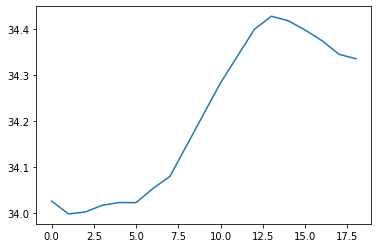

In [10]:
plt.plot(stock[pd.notna(stock['avg_60d'])]['avg_60d'].reset_index(drop=True))

In [9]:
stock[pd.notna(stock['avg_60d'])]['avg_60d'].reset_index(drop=True)

0     34.025833
1     33.997833
2     34.002000
3     34.016667
4     34.022500
5     34.022333
6     34.053167
7     34.079333
8     34.147167
9     34.215333
10    34.282833
11    34.341000
12    34.399000
13    34.427333
14    34.417500
15    34.397333
16    34.374167
17    34.344667
18    34.335000
Name: avg_60d, dtype: float64

In [10]:
result.dtypes

date           object
code           object
open           object
high           object
low            object
close          object
preclose       object
volume         object
amount         object
adjustflag     object
turn           object
tradestatus    object
pctChg         object
peTTM          object
pbMRQ          object
psTTM          object
pcfNcfTTM      object
isST           object
dtype: object

In [7]:
result[0:5]

,date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,peTTM,pbMRQ,psTTM,pcfNcfTTM,isST
0,2017-11-15,sz.300721,20.0500,24.0600,20.0500,24.0600,16.7100,8575,205713.5000,3,0.042768,1,43.985640,30.657271,3.573392,1.658425,-15.129562,0
1,2017-11-16,sz.300721,26.4700,26.4700,26.4700,26.4700,24.0600,2640,69880.8000,3,0.013167,1,10.016620,33.728095,3.931326,1.824543,-16.645034,0
2,2017-11-17,sz.300721,29.1200,29.1200,29.1200,29.1200,26.4700,3200,93184.0000,3,0.015960,1,10.011340,37.104728,4.324904,2.007204,-18.311424,0
3,2017-11-20,sz.300721,32.0300,32.0300,32.0300,32.0300,29.1200,6625,212198.7500,3,0.033042,1,9.993125,40.812652,4.757097,2.207786,-20.141308,0
4,2017-11-21,sz.300721,35.2300,35.2300,35.2300,35.2300,32.0300,22158,780626.3400,3,0.110514,1,9.990636,44.890095,5.232361,2.428358,-22.153553,0


In [6]:
i = 0
result[['date', 'close']][i:i+5]

,date,close
0,2017-11-15,24.0600
1,2017-11-16,26.4700
2,2017-11-17,29.1200
3,2017-11-20,32.0300
4,2017-11-21,35.2300


In [5]:
# 读取csv文件
stock = pd.read_csv(stock_code + ".csv")

In [6]:
stock.dtypes

date            object
code            object
open           float64
high           float64
low            float64
close          float64
preclose       float64
volume           int64
amount         float64
adjustflag       int64
turn           float64
tradestatus      int64
pctChg         float64
peTTM          float64
pbMRQ          float64
psTTM          float64
pcfNcfTTM      float64
isST             int64
dtype: object

In [7]:
stock['variation'] = (stock['close'] - stock['close'].shift(1))/stock['close'].shift(1) * 100
stock['variation'] 

0            NaN
1      10.016625
2      10.011334
3       9.993132
4       9.990634
         ...    
800    -0.377054
801    -1.865369
802    -0.055096
803    -1.626240
804    -6.976744
Name: variation, Length: 805, dtype: float64

In [83]:
for i in range(-20, 21, 2):
    print(i, end=', ')


-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 

In [89]:
# https://blog.csdn.net/qq_41892229/article/details/109702038
stock_bins = [-10, -5, -3, 3, 5, 10]
stock_GEM_bins = [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]   # 创业板
labels = stock_GEM_bins.copy()
labels.remove(0)
a, b = pd.cut(x=stock['variation'], bins=stock_GEM_bins, retbins=True, right=True, labels= labels)

In [90]:
a.value_counts(sort=False)

-20      0
-18      0
-16      0
-14      0
-12      7
-10     10
-8      23
-6      37
-4     122
-2     189
 2     219
 4     110
 6      45
 8       9
 10     15
 12     17
 14      1
 16      0
 18      0
 20      0
Name: variation, dtype: int64

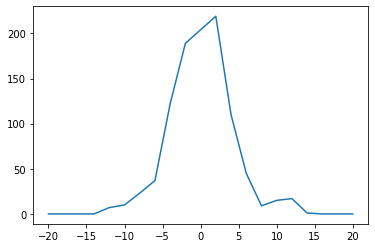

In [91]:
plt.plot(a.value_counts(sort=False).index, a.value_counts(sort=False).values)

[]